# Práctica 4. Procesamiento audio

#### EJERCICIO 1
#### Parte obligatoria + apartado opcional b (reconocimiento de octavas)

C:\Users\ariss\AppData\Local\Temp\ipykernel_3432\2794302047.py:23: WavFileWarning: Chunk (non-data) not understood, skipping it.
  frecuencia_muestreo, datos = wav.read(archivo_wav)


Frecuencia identificada: 65.04 Hz
La nota musical es: C2


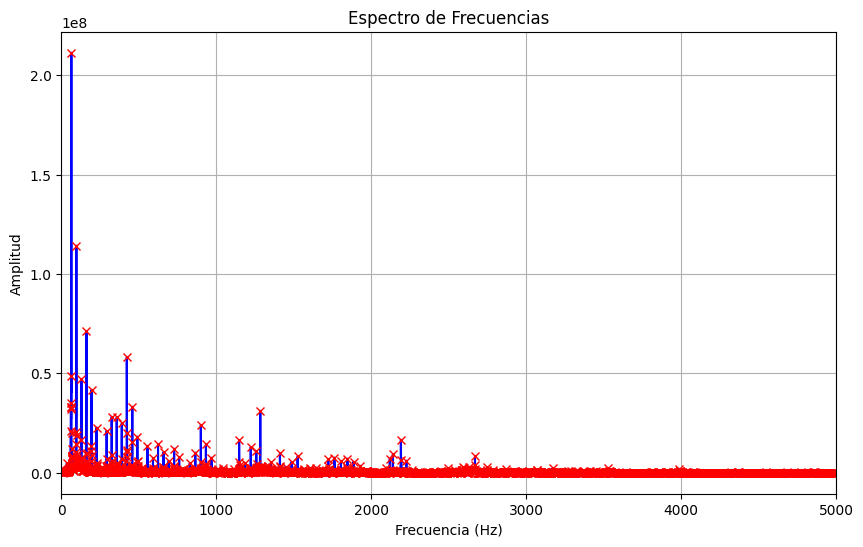

In [24]:
import numpy as np
import scipy.io.wavfile as wav
from scipy.fft import fft
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Diccionario de frecuencias para todas las octavas (0 a 8)
notas_frecuencias = {
    'C0': 16.35, 'C#0 / Db0': 17.32, 'D0': 18.35, 'D#0 / Eb0': 19.45, 'E0': 20.60, 'F0': 21.83, 'F#0 / Gb0': 23.12, 'G0': 24.50, 'G#0 / Ab0': 25.96, 'A0': 27.50, 'A#0 / Bb0': 29.14, 'B0': 30.87,
    'C1': 32.70, 'C#1 / Db1': 34.65, 'D1': 36.71, 'D#1 / Eb1': 38.89, 'E1': 41.20, 'F1': 43.65, 'F#1 / Gb1': 46.25, 'G1': 49.00, 'G#1 / Ab1': 51.91, 'A1': 55.00, 'A#1 / Bb1': 58.27, 'B1': 61.74,
    'C2': 65.41, 'C#2 / Db2': 69.30, 'D2': 73.42, 'D#2 / Eb2': 77.78, 'E2': 82.41, 'F2': 87.31, 'F#2 / Gb2': 92.50, 'G2': 98.00, 'G#2 / Ab2': 103.83, 'A2': 110.00, 'A#2 / Bb2': 116.54, 'B2': 123.47,
    'C3': 130.81, 'C#3 / Db3': 138.59, 'D3': 146.83, 'D#3 / Eb3': 155.56, 'E3': 164.81, 'F3': 174.61, 'F#3 / Gb3': 185.00, 'G3': 196.00, 'G#3 / Ab3': 207.65, 'A3': 220.00, 'A#3 / Bb3': 233.08, 'B3': 246.94,
    'C4': 261.63, 'C#4 / Db4': 277.18, 'D4': 293.66, 'D#4 / Eb4': 311.13, 'E4': 329.63, 'F4': 349.23, 'F#4 / Gb4': 369.99, 'G4': 392.00, 'G#4 / Ab4': 415.30, 'A4': 440.00, 'A#4 / Bb4': 466.16, 'B4': 493.88,
    'C5': 523.25, 'C#5 / Db5': 554.37, 'D5': 587.33, 'D#5 / Eb5': 622.25, 'E5': 659.25, 'F5': 698.46, 'F#5 / Gb5': 739.99, 'G5': 783.99, 'G#5 / Ab5': 830.61, 'A5': 880.00, 'A#5 / Bb5': 932.33, 'B5': 987.77,
    'C6': 1046.50, 'C#6 / Db6': 1108.73, 'D6': 1174.66, 'D#6 / Eb6': 1244.51, 'E6': 1318.51, 'F6': 1396.91, 'F#6 / Gb6': 1479.98, 'G6': 1567.98, 'G#6 / Ab6': 1661.22, 'A6': 1760.00, 'A#6 / Bb6': 1864.66, 'B6': 1975.53,
    'C7': 2093.00, 'C#7 / Db7': 2217.46, 'D7': 2349.32, 'D#7 / Eb7': 2489.02, 'E7': 2637.02, 'F7': 2793.83, 'F#7 / Gb7': 2959.96, 'G7': 3135.96, 'G#7 / Ab7': 3322.44, 'A7': 3520.00, 'A#7 / Bb7': 3729.31, 'B7': 3951.07,
    'C8': 4186.01, 'C#8 / Db8': 4434.92, 'D8': 4698.64, 'D#8 / Eb8': 4978.03, 'E8': 5274.04, 'F8': 5587.65, 'F#8 / Gb8': 5919.91, 'G8': 6271.93, 'G#8 / Ab8': 6644.88, 'A8': 7040.00, 'A#8 / Bb8': 7458.62, 'B8': 7902.13
}

# Función para leer un archivo de audio y devolver el espectro de frecuencias
def obtener_espectro_frecuencias(archivo_wav):
    frecuencia_muestreo, datos = wav.read(archivo_wav)
    
    # Si el audio es estéreo, tomar solo un canal
    if len(datos.shape) > 1:
        datos = datos[:, 0]
    
    # Aplicar FFT para obtener las frecuencias
    n = len(datos)
    fft_datos = fft(datos) # Aplicar la FFT
    fft_datos = np.abs(fft_datos[:n//2])  # Nos quedamos con la mitad de la FFT (la otra mitad es simétrica)
    freqs = np.fft.fftfreq(n, 1/frecuencia_muestreo) # Obtener las frecuencias correspondientes a el resultado de la FFT
    freqs = freqs[:n//2]  # Nos quedamos con la mitad de las frecuencias (la parte positiva)
    
    return freqs, fft_datos

def graficar_espectro_frecuencias(archivo_wav):
    freqs, fft_datos = obtener_espectro_frecuencias(archivo_wav)
    
    # Encontrar picos en el espectro
    peaks, _ = find_peaks(fft_datos, height=0.1)

    plt.figure(figsize=(10, 6))
    plt.plot(freqs, fft_datos, color='b')
    plt.plot(freqs[peaks], fft_datos[peaks], "x", color='r')  # Los picos son rojos
    plt.title('Espectro de Frecuencias')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.xlim([0, 5000])  
    plt.grid(True)
    plt.show()

# Función para identificar la frecuencia principal y la nota más cercana
def identificar_frecuencia_y_nota(archivo_wav):
    freqs, fft_datos = obtener_espectro_frecuencias(archivo_wav)

    # Encontrar picos en el espectro
    peaks, _ = find_peaks(fft_datos, height=0.1)
    if len(peaks) == 0:
        return None, None  # Si no hay picos, retornar None

    # Tomar el pico más alto
    indice_frecuencia_max = peaks[np.argmax(fft_datos[peaks])]
    frecuencia_principal = freqs[indice_frecuencia_max]
    
    # Identificar la nota más cercana a la frecuencia principal
    nota_cercana = min(notas_frecuencias, key=lambda nota: abs(notas_frecuencias[nota] - frecuencia_principal))
    
    return frecuencia_principal, nota_cercana

# Ruta del archivo de audio
archivo_wav = "C:/Descargas/Aris/Documentos/ULPGC/cuarto_ano/PIAV/practica4/sonidos_ej1/c2.wav" 

# llamada a funciones de arriba
frecuencia_principal, nota = identificar_frecuencia_y_nota(archivo_wav)
if frecuencia_principal is not None:
    print(f"Frecuencia identificada: {frecuencia_principal:.2f} Hz")
    print(f"La nota musical es: {nota}")
else:
    print("No se pudo identificar la frecuencia principal.")

# llamada a graficacion
graficar_espectro_frecuencias(archivo_wav)

#### Apartado opcional a (instrumento: trompeta) + apartado opcional b (reconocimiento de octavas)

C:\Users\ariss\AppData\Local\Temp\ipykernel_3432\1702766433.py:43: WavFileWarning: Chunk (non-data) not understood, skipping it.
  frecuencia_muestreo, datos = wav.read(archivo_wav)


Frecuencia identificada: 253.28 Hz
La nota musical es: B3


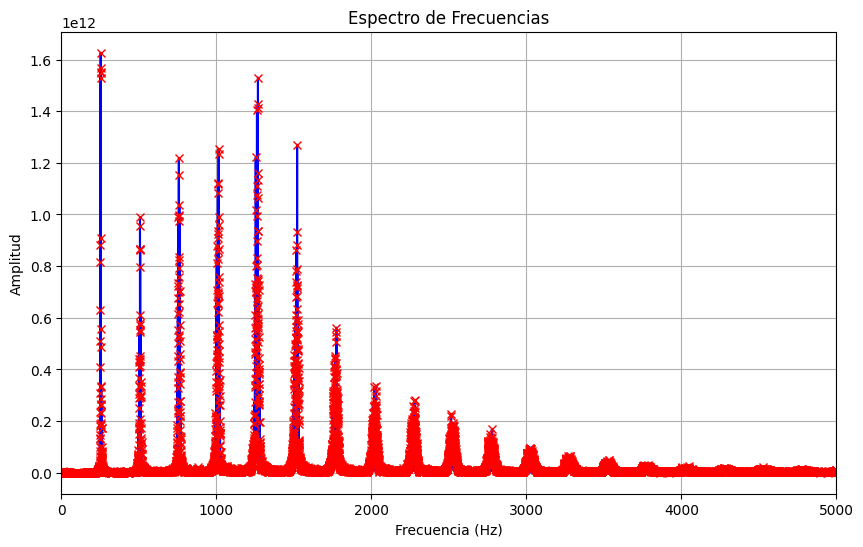

In [28]:
import numpy as np
import scipy.io.wavfile as wav
from scipy.fft import fft
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Diccionario de frecuencias para todas las octavas de la trompeta
notas_frecuencias = {
    'G3': 196.00,  # G3
    'G#3/Ab3': 207.65,  # G#3/Ab3
    'A3': 220.00,  # A3
    'A#3/Bb3': 233.08,  # A#3/Bb3
    'B3': 246.94,  # B3
    'C4': 261.63,  # C4
    'C#4/Db4': 277.18,  # C#4/Db4
    'D4': 293.66,  # D4
    'D#4/Eb4': 311.13,  # D#4/Eb4
    'E4': 329.63,  # E4
    'F4': 349.23,  # F4
    'F#4/Gb4': 369.99,  # F#4/Gb4
    'G4': 392.00,  # G4
    'G#4/Ab4': 415.30,  # G#4/Ab4
    'A4': 440.00,  # A4
    'A#4/Bb4': 466.16,  # A#4/Bb4
    'B4': 493.88,  # B4
    'C5': 523.25,  # C5
    'C#5/Db5': 554.37,  # C#5/Db5
    'D5': 587.33,  # D5
    'D#5/Eb5': 622.25,  # D#5/Eb5
    'E5': 659.25,  # E5
    'F5': 698.46,  # F5
    'F#5/Gb5': 739.99,  # F#5/Gb5
    'G5': 783.99,  # G5
    'G#5/Ab5': 830.61,  # G#5/Ab5
    'A5': 880.00,  # A5
    'A#5/Bb5': 932.33,  # A#5/Bb5
    'B5': 987.77   # B5
}

# Función para leer un archivo de audio y devolver el espectro de frecuencias
def obtener_espectro_frecuencias(archivo_wav):
    frecuencia_muestreo, datos = wav.read(archivo_wav)
    
    # Si el audio es estéreo, tomar solo un canal
    if len(datos.shape) > 1:
        datos = datos[:, 0]
    
    # Aplicar FFT para obtener las frecuencias
    n = len(datos)
    fft_datos = fft(datos) # Aplicar la FFT
    fft_datos = np.abs(fft_datos[:n//2])  # Nos quedamos con la mitad de la FFT (la otra mitad es simétrica)
    freqs = np.fft.fftfreq(n, 1/frecuencia_muestreo) # Obtener las frecuencias correspondientes a el resultado de la FFT
    freqs = freqs[:n//2]  # Nos quedamos con la mitad de las frecuencias (la parte positiva)
    
    return freqs, fft_datos

def graficar_espectro_frecuencias(archivo_wav):
    freqs, fft_datos = obtener_espectro_frecuencias(archivo_wav)
    
    # Encontrar picos en el espectro
    peaks, _ = find_peaks(fft_datos, height=0.1) 

    plt.figure(figsize=(10, 6))
    plt.plot(freqs, fft_datos, color='b')
    plt.plot(freqs[peaks], fft_datos[peaks], "x", color='r')  # Los picos son rojos
    plt.title('Espectro de Frecuencias')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.xlim([0, 5000])  
    plt.grid(True)
    plt.show()

# Función para identificar la frecuencia principal y la nota más cercana
def identificar_frecuencia_y_nota(archivo_wav):
    freqs, fft_datos = obtener_espectro_frecuencias(archivo_wav)

    # Encontrar picos en el espectro
    peaks, _ = find_peaks(fft_datos, height=0.1)  
    if len(peaks) == 0:
        return None, None  # Si no hay picos, retornar None

    # Tomar el pico más alto
    indice_frecuencia_max = peaks[np.argmax(fft_datos[peaks])]
    frecuencia_principal = freqs[indice_frecuencia_max]
    
    # Identificar la nota más cercana a la frecuencia principal
    nota_cercana = min(notas_frecuencias, key=lambda nota: abs(notas_frecuencias[nota] - frecuencia_principal))
    
    return frecuencia_principal, nota_cercana

# Ruta del archivo de audio
archivo_wav = "C:/Descargas/Aris/Documentos/ULPGC/cuarto_ano/PIAV/practica4/sonidos_ej1/b3trumpet.wav" 

# llamada a funciones de arriba
frecuencia_principal, nota = identificar_frecuencia_y_nota(archivo_wav)
if frecuencia_principal is not None:
    print(f"Frecuencia identificada: {frecuencia_principal:.2f} Hz")
    print(f"La nota musical es: {nota}")
else:
    print("No se pudo identificar la frecuencia principal.")

# llamada a graficacion
graficar_espectro_frecuencias(archivo_wav)

#### Apartado opcional c (identificacion de acordes)

C:\Users\ariss\AppData\Local\Temp\ipykernel_3432\416687923.py:61: WavFileWarning: Chunk (non-data) not understood, skipping it.
  frecuencia_muestreo, datos = wav.read(archivo_wav)


Frecuencias detectadas:  [440.3333333333333, 523.5, 660.1666666666666] Hz
Notas del acorde: A4, C5, E5
Tipo de acorde: A Menor


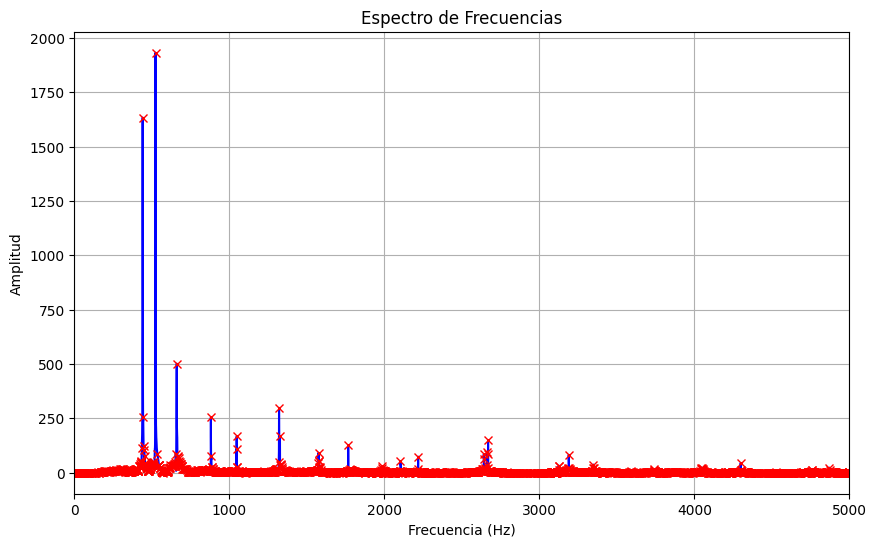

In [35]:
import numpy as np
import scipy.io.wavfile as wav
from scipy.fft import fft
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Diccionario de frecuencias para todos los acordes de piano
acordes_frecuencias = {
    'C Mayor': [261.63, 329.63, 392.00],      # C - E - G
    'C Menor': [261.63, 311.13, 392.00],      # C - D# - G
    'C Aumentado': [261.63, 329.63, 415.30],  # C - E - G#
    'C Disminuido': [261.63, 311.13, 369.99], # C - D# - F#

    'D Mayor': [293.66, 369.99, 440.00],      # D - F# - A
    'D Menor': [293.66, 349.23, 440.00],      # D - F - A
    'D Aumentado': [293.66, 369.99, 466.16],  # D - F# - A#
    'D Disminuido': [293.66, 349.23, 415.30], # D - F - G#

    'E Mayor': [329.63, 415.30, 493.88],      # E - G# - B
    'E Menor': [329.63, 392.00, 493.88],      # E - G - B
    'E Aumentado': [329.63, 415.30, 523.25],  # E - G# - C
    'E Disminuido': [329.63, 392.00, 466.16], # E - G - A#

    'F Mayor': [349.23, 440.00, 523.25],      # F - A - C
    'F Menor': [349.23, 415.30, 523.25],      # F - G# - C
    'F Aumentado': [349.23, 440.00, 554.37],  # F - A - C#
    'F Disminuido': [349.23, 415.30, 493.88], # F - G# - B

    'G Mayor': [392.00, 493.88, 587.33],      # G - B - D
    'G Menor': [392.00, 466.16, 587.33],      # G - A# - D
    'G Aumentado': [392.00, 493.88, 622.25],  # G - B - D#
    'G Disminuido': [392.00, 466.16, 554.37], # G - A# - C#

    'A Mayor': [440.00, 554.37, 659.25],      # A - C# - E
    'A Menor': [440.00, 523.25, 659.25],      # A - C - E
    'A Aumentado': [440.00, 554.37, 698.46],  # A - C# - F
    'A Disminuido': [440.00, 523.25, 659.25], # A - C - F#

    'B Mayor': [493.88, 622.25, 739.99],      # B - D# - F#
    'B Menor': [493.88, 587.33, 739.99],      # B - D - F#
    'B Aumentado': [493.88, 622.25, 783.99],  # B - D# - G
    'B Disminuido': [493.88, 587.33, 698.46], # B - D - F
}

# Diccionario de frecuencias para todas las octavas de piano
notas_frecuencias = {
    'C0': 16.35, 'C#0 / Db0': 17.32, 'D0': 18.35, 'D#0 / Eb0': 19.45, 'E0': 20.60, 'F0': 21.83, 'F#0 / Gb0': 23.12, 'G0': 24.50, 'G#0 / Ab0': 25.96, 'A0': 27.50, 'A#0 / Bb0': 29.14, 'B0': 30.87,
    'C1': 32.70, 'C#1 / Db1': 34.65, 'D1': 36.71, 'D#1 / Eb1': 38.89, 'E1': 41.20, 'F1': 43.65, 'F#1 / Gb1': 46.25, 'G1': 49.00, 'G#1 / Ab1': 51.91, 'A1': 55.00, 'A#1 / Bb1': 58.27, 'B1': 61.74,
    'C2': 65.41, 'C#2 / Db2': 69.30, 'D2': 73.42, 'D#2 / Eb2': 77.78, 'E2': 82.41, 'F2': 87.31, 'F#2 / Gb2': 92.50, 'G2': 98.00, 'G#2 / Ab2': 103.83, 'A2': 110.00, 'A#2 / Bb2': 116.54, 'B2': 123.47,
    'C3': 130.81, 'C#3 / Db3': 138.59, 'D3': 146.83, 'D#3 / Eb3': 155.56, 'E3': 164.81, 'F3': 174.61, 'F#3 / Gb3': 185.00, 'G3': 196.00, 'G#3 / Ab3': 207.65, 'A3': 220.00, 'A#3 / Bb3': 233.08, 'B3': 246.94,
    'C4': 261.63, 'C#4 / Db4': 277.18, 'D4': 293.66, 'D#4 / Eb4': 311.13, 'E4': 329.63, 'F4': 349.23, 'F#4 / Gb4': 369.99, 'G4': 392.00, 'G#4 / Ab4': 415.30, 'A4': 440.00, 'A#4 / Bb4': 466.16, 'B4': 493.88,
    'C5': 523.25, 'C#5 / Db5': 554.37, 'D5': 587.33, 'D#5 / Eb5': 622.25, 'E5': 659.25, 'F5': 698.46, 'F#5 / Gb5': 739.99, 'G5': 783.99, 'G#5 / Ab5': 830.61, 'A5': 880.00, 'A#5 / Bb5': 932.33, 'B5': 987.77,
    'C6': 1046.50, 'C#6 / Db6': 1108.73, 'D6': 1174.66, 'D#6 / Eb6': 1244.51, 'E6': 1318.51, 'F6': 1396.91, 'F#6 / Gb6': 1479.98, 'G6': 1567.98, 'G#6 / Ab6': 1661.22, 'A6': 1760.00, 'A#6 / Bb6': 1864.66, 'B6': 1975.53,
    'C7': 2093.00, 'C#7 / Db7': 2217.46, 'D7': 2349.32, 'D#7 / Eb7': 2489.02, 'E7': 2637.02, 'F7': 2793.83, 'F#7 / Gb7': 2959.96, 'G7': 3135.96, 'G#7 / Ab7': 3322.44, 'A7': 3520.00, 'A#7 / Bb7': 3729.31, 'B7': 3951.07,
    'C8': 4186.01, 'C#8 / Db8': 4434.92, 'D8': 4698.64, 'D#8 / Eb8': 4978.03, 'E8': 5274.04, 'F8': 5587.65, 'F#8 / Gb8': 5919.91, 'G8': 6271.93, 'G#8 / Ab8': 6644.88, 'A8': 7040.00, 'A#8 / Bb8': 7458.62, 'B8': 7902.13
}


# Función para leer un archivo de audio y devolver el espectro de frecuencias
def obtener_espectro_frecuencias(archivo_wav):
    frecuencia_muestreo, datos = wav.read(archivo_wav)
    
    # Si el audio es estéreo, tomar solo un canal
    if len(datos.shape) > 1:
        datos = datos[:, 0]
    
    # Aplicar FFT para obtener las frecuencias
    n = len(datos)
    fft_datos = fft(datos) # Aplicar la FFT
    fft_datos = np.abs(fft_datos[:n//2])  # Nos quedamos con la mitad de la FFT (la otra mitad es simétrica)
    freqs = np.fft.fftfreq(n, 1/frecuencia_muestreo) # Obtener las frecuencias correspondientes a el resultado de la FFT
    freqs = freqs[:n//2]  # Nos quedamos con la mitad de las frecuencias (la parte positiva)
    
    return freqs, fft_datos

def graficar_espectro_frecuencias(archivo_wav):
    freqs, fft_datos = obtener_espectro_frecuencias(archivo_wav)
    
    # Encontrar picos en el espectro
    peaks, _ = find_peaks(fft_datos, height=0.1) 

    plt.figure(figsize=(10, 6))
    plt.plot(freqs, fft_datos, color='b')
    plt.plot(freqs[peaks], fft_datos[peaks], "x", color='r')  # Los picos son rojos
    plt.title('Espectro de Frecuencias')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.xlim([0, 5000])  
    plt.grid(True)
    plt.show()

# Función para identificar el acorde según las tres frecuencias principales
def identificar_acorde(archivo_wav):
    freqs, fft_datos = obtener_espectro_frecuencias(archivo_wav)
    peaks, _ = find_peaks(fft_datos, height=0.1)
    if len(peaks) < 3:
        return None
    
    picos_ordenados = sorted(peaks, key=lambda i: fft_datos[i], reverse=True)[:3]
    frecuencias_principales = [freqs[pico] for pico in picos_ordenados]
    frecuencias_principales.sort()
    
    # Identificar las notas más cercanas
    notas_detectadas = [min(notas_frecuencias, key=lambda nota: abs(notas_frecuencias[nota] - f)) for f in frecuencias_principales]
    
    # Compara las listas de los valores de las claves del diccionario acordes_frecuencias con la lista de las frecuencias principales con un margen de error de 10
    for acorde, notas in acordes_frecuencias.items():
        if all(abs(notas[i] - frecuencias_principales[i]) <= 10 for i in range(3)):
            acorde_cercano = acorde
            break
    else:
        acorde_cercano = None

    return frecuencias_principales, notas_detectadas, acorde_cercano

# Ruta del archivo de audio
archivo_wav = "C:/Descargas/Aris/Documentos/ULPGC/cuarto_ano/PIAV/practica4/sonidos_ej1/amenorACORDE.wav"

# llamada a funciones de arriba
frecuencias, notas, tipo_acorde = identificar_acorde(archivo_wav)
if notas is not None:
    print(f"Frecuencias detectadas: ", frecuencias, "Hz")
    print(f"Notas del acorde: {', '.join(notas)}")
    print(f"Tipo de acorde: {tipo_acorde}")
else:
    print("No se pudo identificar un acorde con tres notas.")

# llamada a graficacion
graficar_espectro_frecuencias(archivo_wav)


#### EJERCICIO 2
#### Parte obligatoria + apartado opcional a (reproducir nota y cambiar parametros)

pygame 2.6.1 (SDL 2.28.4, Python 3.9.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


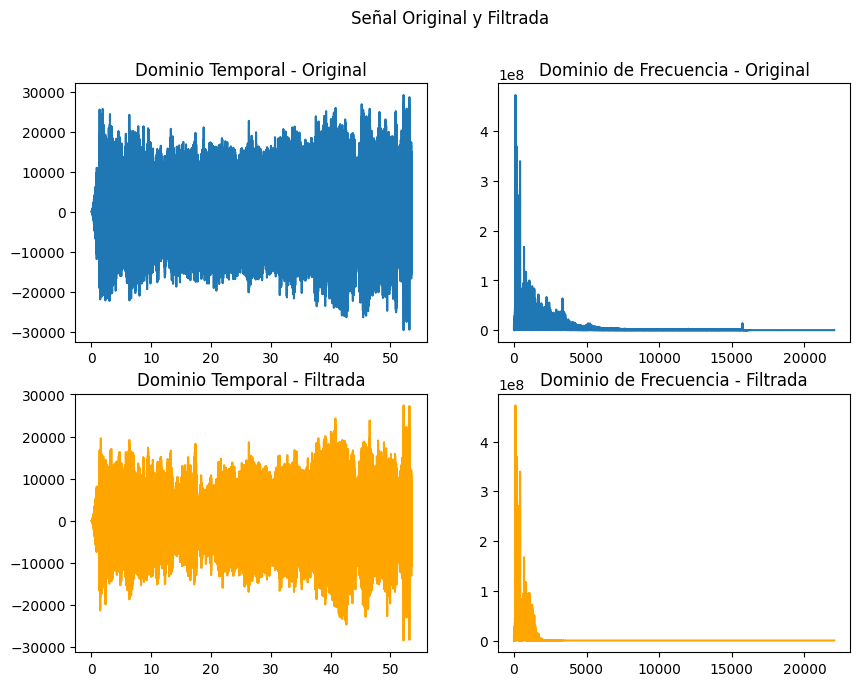

In [1]:
import tkinter as tk
from tkinter import ttk
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, filtfilt
import pygame
import io
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import threading  # Para manejar la reproducción de audio en un hilo separado

# Inicializa pygame para la reproducción de audio
pygame.mixer.init()

# Funciones para crear diferentes tipos de filtros
def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_highpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandstop(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandstop')
    return b, a

# Función para aplicar el filtro seleccionado a la señal de audio
def apply_filter(data, fs, filter_type, cutoff1, cutoff2, order):
    if cutoff2 is not None and cutoff1 > cutoff2:
        cutoff1, cutoff2 = cutoff2, cutoff1

    if filter_type == "Pasa-bajos":
        b, a = butter_lowpass(cutoff1, fs, order)
    elif filter_type == "Pasa-altos":
        b, a = butter_highpass(cutoff1, fs, order)
    elif filter_type == "Pasa-banda":
        b, a = butter_bandpass(cutoff1, cutoff2, fs, order)
    elif filter_type == "Rechaza-banda":
        b, a = butter_bandstop(cutoff1, cutoff2, fs, order)
    return filtfilt(b, a, data)

# Carga el archivo de audio para procesar
sample_rate, data = wavfile.read('sonido_ej2/un_archivo_audio2.wav')
if len(data.shape) > 1:
    data = data[:, 0]

# Clase principal de la aplicación de filtros de audio con Tkinter
class AudioFilterApp(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Filtro de Audio")

        # Variables de control para el tipo de filtro, cortes y orden predeterminados
        self.filter_type = tk.StringVar(value="Pasa-bajos")
        self.cutoff1 = tk.IntVar(value=1)
        self.cutoff2 = tk.IntVar(value=200)
        self.order = tk.IntVar(value=5)

        # Menú de selección de filtros
        ttk.Label(self, text="Tipo de Filtro").pack(pady=5)
        filter_menu = ttk.OptionMenu(self, self.filter_type, "Pasa-bajos", "Pasa-bajos", "Pasa-altos", "Pasa-banda", "Rechaza-banda", command=self.update_filter_type)
        filter_menu.pack(pady=5)

        # Slider para el primer valor de corte
        ttk.Label(self, text="Corte1").pack()
        cutoff1_slider = ttk.Scale(self, from_=1, to=5000, orient='horizontal', variable=self.cutoff1, command=lambda e: self.update_display())
        cutoff1_slider.pack(pady=5)

        # Slider para el segundo valor de corte, solo habilitado para ciertos filtros
        self.cutoff2_label = ttk.Label(self, text="Corte2")
        self.cutoff2_slider = ttk.Scale(self, from_=1, to=5000, orient='horizontal', variable=self.cutoff2, command=lambda e: self.update_display())
        self.cutoff2_slider.pack(pady=5)

        # Slider para el orden del filtro
        ttk.Label(self, text="Orden del Filtro").pack()
        order_slider = ttk.Scale(self, from_=1, to=10, orient='horizontal', variable=self.order, command=lambda e: self.update_display())
        order_slider.pack(pady=5)

        self.info_label = ttk.Label(self, text="")
        self.info_label.pack(pady=10)

        play_button = ttk.Button(self, text="Play Audio", command=self.play_audio)
        play_button.pack(pady=10)

        # Configura el área de gráficos
        self.fig, (self.ax1, self.ax2) = plt.subplots(2, 2, figsize=(10, 8))
        self.fig.suptitle('Señal Original y Filtrada')
        self.canvas = FigureCanvasTkAgg(self.fig, master=self)
        self.canvas.get_tk_widget().pack()

        self.update_filter_type()

    def update_filter_type(self, *args):
        if self.filter_type.get() in ["Pasa-banda", "Rechaza-banda"]:
            self.cutoff2_slider.state(['!disabled'])
            self.cutoff2_label.config(state='normal')
        else:
            self.cutoff2_slider.state(['disabled'])
            self.cutoff2_label.config(state='disabled')

        self.update_display()

    def update_display(self):
        filter_name = self.filter_type.get()
        cutoff1 = self.cutoff1.get()
        cutoff2 = self.cutoff2.get() if filter_name in ["Pasa-banda", "Rechaza-banda"] else None
        
        text = f"Filtro: {filter_name}\nCorte1: {cutoff1}"
        if cutoff2:
            text += f", Corte2: {cutoff2}"
        text += f"\nOrden: {self.order.get()}"
        self.info_label.config(text=text)

    def plot_signals(self, original_data, filtered_data):
        time = np.arange(len(original_data)) / sample_rate
        freq = np.fft.fftfreq(len(original_data), 1/sample_rate)
        
        original_fft = np.abs(np.fft.fft(original_data))
        filtered_fft = np.abs(np.fft.fft(filtered_data))

        self.ax1[0].clear()
        self.ax1[0].plot(time, original_data, label='Original')
        self.ax1[0].set_title('Dominio Temporal - Original')
        self.ax1[1].clear()
        self.ax1[1].plot(freq[:len(freq)//2], original_fft[:len(freq)//2], label='Original')
        self.ax1[1].set_title('Dominio de Frecuencia - Original')

        self.ax2[0].clear()
        self.ax2[0].plot(time, filtered_data, label='Filtrada', color='orange')
        self.ax2[0].set_title('Dominio Temporal - Filtrada')
        self.ax2[1].clear()
        self.ax2[1].plot(freq[:len(freq)//2], filtered_fft[:len(freq)//2], label='Filtrada', color='orange')
        self.ax2[1].set_title('Dominio de Frecuencia - Filtrada')

        self.canvas.draw()

    def play_audio(self):
        # Ejecuta la reproducción de audio en un hilo separado para no bloquear la interfaz
        threading.Thread(target=self._play_audio_thread).start()

    def _play_audio_thread(self):
        filter_name = self.filter_type.get()
        cutoff1 = self.cutoff1.get()
        cutoff2 = self.cutoff2.get() if filter_name in ["Pasa-banda", "Rechaza-banda"] else None
        order = self.order.get()

        filtered_data = apply_filter(data, sample_rate, filter_name, cutoff1, cutoff2, order)
        self.plot_signals(data, filtered_data)

        max_val = np.max(np.abs(filtered_data))
        if max_val > 0:
            filtered_data_normalized = np.int16(filtered_data / max_val * 32767)
        else:
            filtered_data_normalized = np.zeros_like(filtered_data, dtype=np.int16)

        byte_io = io.BytesIO()
        wavfile.write(byte_io, sample_rate, filtered_data_normalized)
        byte_io.seek(0)

        pygame.mixer.music.load(byte_io)
        pygame.mixer.music.play()

# Ejecuta la aplicación
app = AudioFilterApp()
app.mainloop()
pygame.quit()
